# SME0823 Modelos de Regressão e Aprendizado Supervisionado II

# Avaliação de métricas de desempenho preditivo


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



Aplicação revisitada: A diabetes é uma doença causada pela produção insuficiente ou má absorção de insulina, hormônio que regula a glicose no sangue e garante energia para o organismo.

Em um estudo, 150 pacientes com diabetes ou pré-diabetes receberam acompanhamento por 2 anos e em seguida foram coletadas informações básicas: idade, sexo, índice de massa corporal, pressão arterial média e uma medida de soro sanguíneo, além da medida de hemoglobina glicada e a classificação se o indivíduo tem ou não diabetes após o acompanhamento.

A listagem das variáveis disponíveis é dada a seguir

- 'Idade', em anos completos;
- 'Sexo' (1 se feminino, 0 se masculino);
- 'IMC': Índice de massa corporal;
- 'PAM': Pressão arterial média;
- 'S': uma medida de soro sanguíneo;
- 'Y': hemoglobina glicada;
- 'diabetes': 1, se o paciente desenvolveu diabetes e 0, caso contrário;

Atenção: 'Y' e 'diabetes' são ambas variáveis-resposta, uma contínua e uma categórica, e não devem ser usadas como variáveis preditoras.

Os dados estão disponíveis em https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv


1. Em um enfoque preditivo, considere diabetes como variável resposta e Sexo como variável preditora, divida a base em treinamento (70\%) e teste (30\%). Comece com um modelo de regressão logística.

2. Apresente a matriz de confusão e calcule métricas de avaliação de modelos

- Acurácia

- Precisão (Precision)

- Revocação / Sensibilidade (Recall / Sensitivity)

- Especificidade (Specificity)

- F1-Score

- Taxa de Falsos Positivos (FPR – False Positive Rate)

- Taxa de Falsos Negativos (FNR – False Negative Rate)

- Balanced Accuracy

- G-Mean (Geometric Mean)

- Matthews Correlation Coefficient (MCC)

- Kappa de Cohen

- AUC – Área sob a Curva ROC

- Curva ROC

3. Compare os resultados em uma tabela para modelos probito e complemento log-log.

4. Pesquise sobre modelos de aprendizado de máquina e faça uma tabela com as métricas acima considerando esses modelos. Algumas possibilidades:

- Support Vector Machine (SVM)

- Árvore de Decisão (Decision Tree)

- Random Forest

- K-Nearest Neighbors (KNN)

- Naive Bayes

- Gradient Boosting (ex: XGBoost, LightGBM, CatBoost)


In [34]:
!pip install statsmodels

## Carregamento de pacotes e leitura de dados

In [35]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
caminho = 'https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv'
df = pd.read_csv(caminho, sep=';', index_col='ID')
df.head(3)

,Idade,Sexo,IMC,PAM,S,Y,diabetes
ID,,,,,,,
112126,32,0,27.2878,84.9978,6.0216,6.1589,0
897505,43,1,29.5730,82.5959,5.1257,6.9437,1
650952,47,1,24.3119,88.0686,3.4778,7.2397,1


## 1. Divisão da base em treinamento e teste

## Códigos desenvolvidos para o modelo de regressão logística

### Modelo Linear Generalizado com Resposta Bernoulli e Ligação Logito

Seja $Y_i \sim \text{Bernoulli}(\mu_i)$ a variável resposta, com $\mu_i = \mathbb{P}(Y=1)$.

Um modelo linear generalizado (GLM) com ligação logito é definido com:

$
\text{logit}(\mu_i) = \displaystyle\log\left(\frac{\mu_i}{1-\mu_i}\right) = \eta = X_i^\top\beta,
$

onde:
- $\mu_i$ é a probabilidade de sucesso,
- $X_i$ é o vetor de covariáveis para a observação i,
- $\beta$ é o vetor de parâmetros.



In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Preditoras e resposta
X = df[['Sexo']]
y = df['diabetes']

# Adiciona o intercepto (coluna de 1s)
X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Ajuste do modelo de regressão logística no conjunto de treinamento

glm_binom = sm.GLM(y_train, X_train, family=sm.families.Binomial())
res = glm_binom.fit()



In [38]:
# Resumo do modelo
print(res.summary())

# Predições no conjunto de teste

y_pred_prob = res.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Visualiza primeiras previsões
print("\nProbabilidades previstas:")
print(y_pred_prob.head())

print("\nClasses previstas:")
print(y_pred.head())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  105
Model:                            GLM   Df Residuals:                      103
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70.038
Date:                Mon, 20 Oct 2025   Deviance:                       140.08
Time:                        21:26:00   Pearson chi2:                     105.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02558
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8329      0.379     -2.199      0.0


--- MÉTRICAS NA BASE DE TREINAMENTO ---
Acurácia                 : 0.581
Precisão                 : 0.000
Recall (Sens)            : 0.000
Especificidade           : 1.000
F1-Score                 : 0.000
FPR                      : 0.000
FNR                      : 1.000
Balanced Acc             : 0.500
G-Mean                   : 0.000
MCC                      : 0.000
Kappa                    : 0.000
AUC                      : 0.575

--- MÉTRICAS NA BASE DE TESTE ---
Acurácia                 : 0.578
Precisão                 : 0.000
Recall (Sens)            : 0.000
Especificidade           : 1.000
F1-Score                 : 0.000
FPR                      : 0.000
FNR                      : 1.000
Balanced Acc             : 0.500
G-Mean                   : 0.000
MCC                      : 0.000
Kappa                    : 0.000
AUC                      : 0.585


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


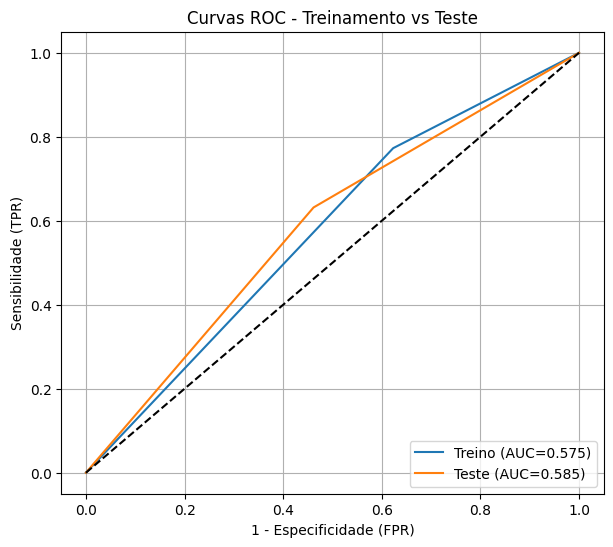

In [39]:

# Métricas de desempenho - Treinamento

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score
)
from math import sqrt
import matplotlib.pyplot as plt


# Função para calcular as métricas

def avaliar_modelo(y_true, y_prob, limiar=0.5):
    y_pred = (y_prob >= limiar).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    VP, FP, FN, VN = cm[1,1], cm[0,1], cm[1,0], cm[0,0]

    acuracia = accuracy_score(y_true, y_pred)
    precisao = precision_score(y_true, y_pred)
    revocacao = recall_score(y_true, y_pred)
    especificidade = VN / (VN + FP)
    f1 = f1_score(y_true, y_pred)
    fpr = FP / (FP + VN)
    fnr = FN / (FN + VP)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    gmean = sqrt(revocacao * especificidade)
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    return {
        'Acurácia': acuracia,
        'Precisão': precisao,
        'Recall (Sens)': revocacao,
        'Especificidade': especificidade,
        'F1-Score': f1,
        'FPR': fpr,
        'FNR': fnr,
        'Balanced Acc': balanced_acc,
        'G-Mean': gmean,
        'MCC': mcc,
        'Kappa': kappa,
        'AUC': auc
    }


# Avaliação no conjunto de treinamento

y_train_prob = res.predict(X_train)
metricas_treino = avaliar_modelo(y_train, y_train_prob)

print("\n--- MÉTRICAS NA BASE DE TREINAMENTO ---")
for k, v in metricas_treino.items():
    print(f"{k:25s}: {v:.3f}")


# Avaliação no conjunto de TESTE

y_test_prob = res.predict(X_test)
metricas_teste = avaliar_modelo(y_test, y_test_prob)

print("\n--- MÉTRICAS NA BASE DE TESTE ---")
for k, v in metricas_teste.items():
    print(f"{k:25s}: {v:.3f}")


# Curvas ROC (Treino e Teste)

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr_train, tpr_train, label=f'Treino (AUC={metricas_treino["AUC"]:.3f})')
plt.plot(fpr_test, tpr_test, label=f'Teste (AUC={metricas_teste["AUC"]:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('Curvas ROC - Treinamento vs Teste')
plt.xlabel('1 - Especificidade (FPR)')
plt.ylabel('Sensibilidade (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [40]:

# Comparação entre GLM Logit, Probit e Complementary Log–Log

import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score
)
from math import sqrt




# Ajuste dos três modelos GLM

# Funções de ligação
links = {
    "Logit": sm.families.links.Logit(),
    "Probit": sm.families.links.Probit(),
    "Complementary log-log": sm.families.links.CLogLog()
}

resultados = []

for nome, link in links.items():
    # Ajusta o modelo na base de treinamento
    modelo = sm.GLM(y_train, X_train, family=sm.families.Binomial(link=link))
    res = modelo.fit()

    # Faz predições no conjunto de teste
    y_prob = res.predict(X_test)
    metricas = avaliar_modelo(y_test, y_prob)
    metricas["Modelo"] = nome

    resultados.append(metricas)

# Criação da tabela de comparação

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.set_index("Modelo").round(3)

print("\n--- Comparação de Desempenho ---")
print(df_resultados)





--- Comparação de Desempenho ---
                       Acurácia  Precisão  Recall (Sens)  Especificidade  \
Modelo                                                                     
Logit                     0.578       0.0            0.0             1.0   
Probit                    0.578       0.0            0.0             1.0   
Complementary log-log     0.578       0.0            0.0             1.0   

                       F1-Score  FPR  FNR  Balanced Acc  G-Mean  MCC  Kappa  \
Modelo                                                                        
Logit                       0.0  0.0  1.0           0.5     0.0  0.0    0.0   
Probit                      0.0  0.0  1.0           0.5     0.0  0.0    0.0   
Complementary log-log       0.0  0.0  1.0           0.5     0.0  0.0    0.0   

                         AUC  
Modelo                        
Logit                  0.585  
Probit                 0.585  
Complementary log-log  0.585  


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
